In [1]:
# grafo
graph = {
    0: [1],
    1: [2, 4, 7],
    2: [2, 3, 4, 7],
    3: [4, 7],
    4: [5, 6, 7],
    5: [7],
    6: [7],
    7: [],
}

# [7] Trabajo: Prestaciones de los sistemas

## Importación de las librerías necesarias

In [2]:
import numpy as np
import utils_ecuaciones as utils
import matplotlib.pyplot as plt

## Matrices de probabilidad

En este trabajo se condideran dos tipos de usuarios, los usuarios de tipo A y los de tipo B, los cuales utilizan un sistema de subastas web de diferente forma. La matriz de probabilidad para cada tipo de usuario ha sido extraida del capitulo 8 del libro de Menascé.

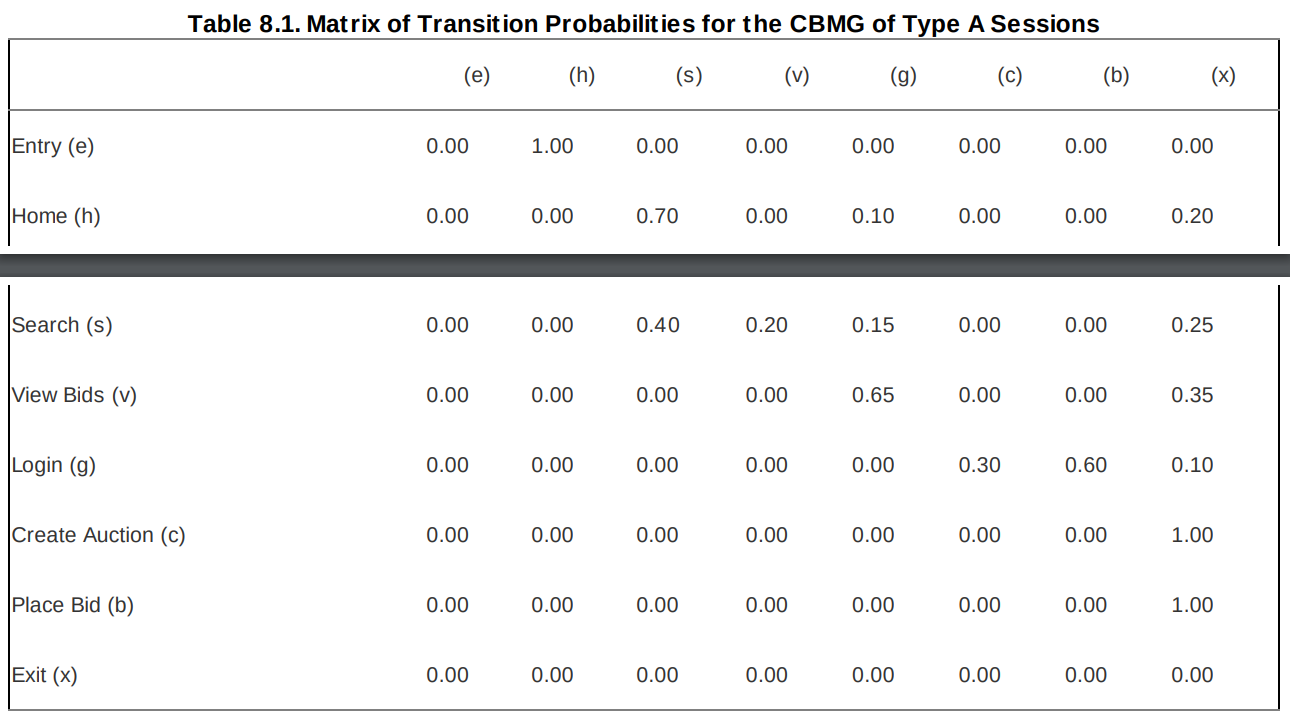

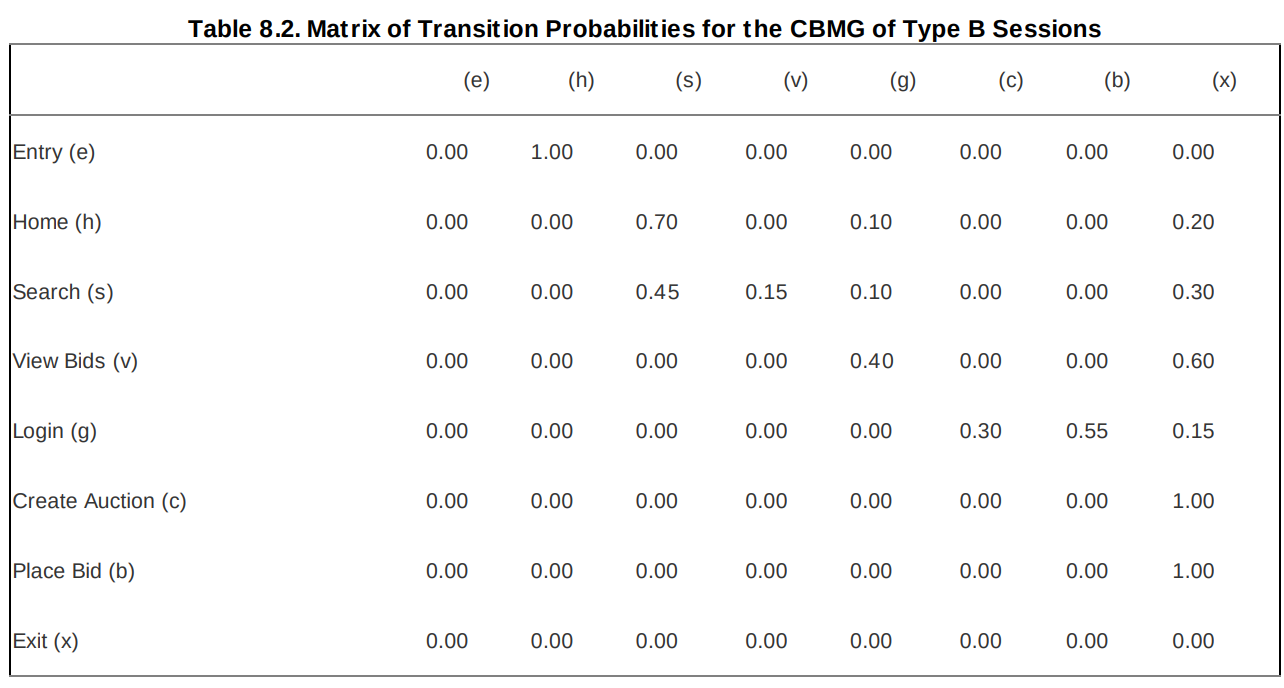

Como se puede ver a continuación, hemos creado una variable llamada `matriz_probabilidad_tipo_A`, la cual contiene la matriz de porbabilidad correspondiente al usuario de tipo A y, también, hemos creado otra variable llamada `matriz_probabilidad_tipo_B`, la cual contiene la matriz de porbabilidad correspondiente al usuario de tipo B.

In [3]:
matriz_probabilidad_tipo_A = [
    [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.7, 0.0, 0.1, 0.0, 0.0, 0.2],
    [0.0, 0.0, 0.4, 0.2, 0.15, 0.0, 0.0, 0.25],
    [0.0, 0.0, 0.0, 0.0, 0.65, 0.0, 0.0, 0.35],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.6, 0.1],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
]
matriz_probabilidad_tipo_B = [
    [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.7, 0.0, 0.1, 0.0, 0.0, 0.2],
    [0.0, 0.0, 0.45, 0.15, 0.1, 0.0, 0.0, 0.3],
    [0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.0, 0.6],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.55, 0.15],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
]


def print_matrix(matrix):
    # printear matriz de manera bonita y de forma igual
    indexes = ["e", "h", "s", "v", "g", "c", "b", "x"]
    print("     (e)   (h)   (s)   (v)   (g)   (c)   (b)   (x)")
    for i, row in enumerate(matrix):
        print(f"({indexes[i]})", end=" ")
        for elem in row:
            print(f"{elem:5.2f}", end=" ")
        print()
    print()


print("Matriz A")
print_matrix(matriz_probabilidad_tipo_A)
print("Matriz B")
print_matrix(matriz_probabilidad_tipo_B)

Matriz A
     (e)   (h)   (s)   (v)   (g)   (c)   (b)   (x)
(e)  0.00  1.00  0.00  0.00  0.00  0.00  0.00  0.00 
(h)  0.00  0.00  0.70  0.00  0.10  0.00  0.00  0.20 
(s)  0.00  0.00  0.40  0.20  0.15  0.00  0.00  0.25 
(v)  0.00  0.00  0.00  0.00  0.65  0.00  0.00  0.35 
(g)  0.00  0.00  0.00  0.00  0.00  0.30  0.60  0.10 
(c)  0.00  0.00  0.00  0.00  0.00  0.00  0.00  1.00 
(b)  0.00  0.00  0.00  0.00  0.00  0.00  0.00  1.00 
(x)  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 

Matriz B
     (e)   (h)   (s)   (v)   (g)   (c)   (b)   (x)
(e)  0.00  1.00  0.00  0.00  0.00  0.00  0.00  0.00 
(h)  0.00  0.00  0.70  0.00  0.10  0.00  0.00  0.20 
(s)  0.00  0.00  0.45  0.15  0.10  0.00  0.00  0.30 
(v)  0.00  0.00  0.00  0.00  0.40  0.00  0.00  0.60 
(g)  0.00  0.00  0.00  0.00  0.00  0.30  0.55  0.15 
(c)  0.00  0.00  0.00  0.00  0.00  0.00  0.00  1.00 
(b)  0.00  0.00  0.00  0.00  0.00  0.00  0.00  1.00 
(x)  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 



## Porcentaje de visitas que un de usuario realiza a cada estado

Partiendo de las matrices anteriores, se puede calcular, para cada tipo de usuario, el porcentaje de visitas que realiza a cada estado. Para ello se emplea la siguiente ecuación:

$$
v^{\alpha}[i] = \sum_{k \in I} v^{\alpha}[k] * p^{\alpha}_{k,i}
$$

Donde
- $i \in I$ 
- $i \neq (e)$, $I = {e, h, s, g, v, c, b, x}$
- $\alpha \in {A, B}$
- $p^{\alpha}_{k,i}$ es la probabilidad de que el tipo usuario $\alpha$, estando en el estado k, a continaucón realice una nueva operación para visitar el estado i.

Al igual que para las matrices de probabilidad, los valores del porcentaje de visitas que cada tipo de usuario realiza a cada estado se pueden obtener del libro de Menascé.

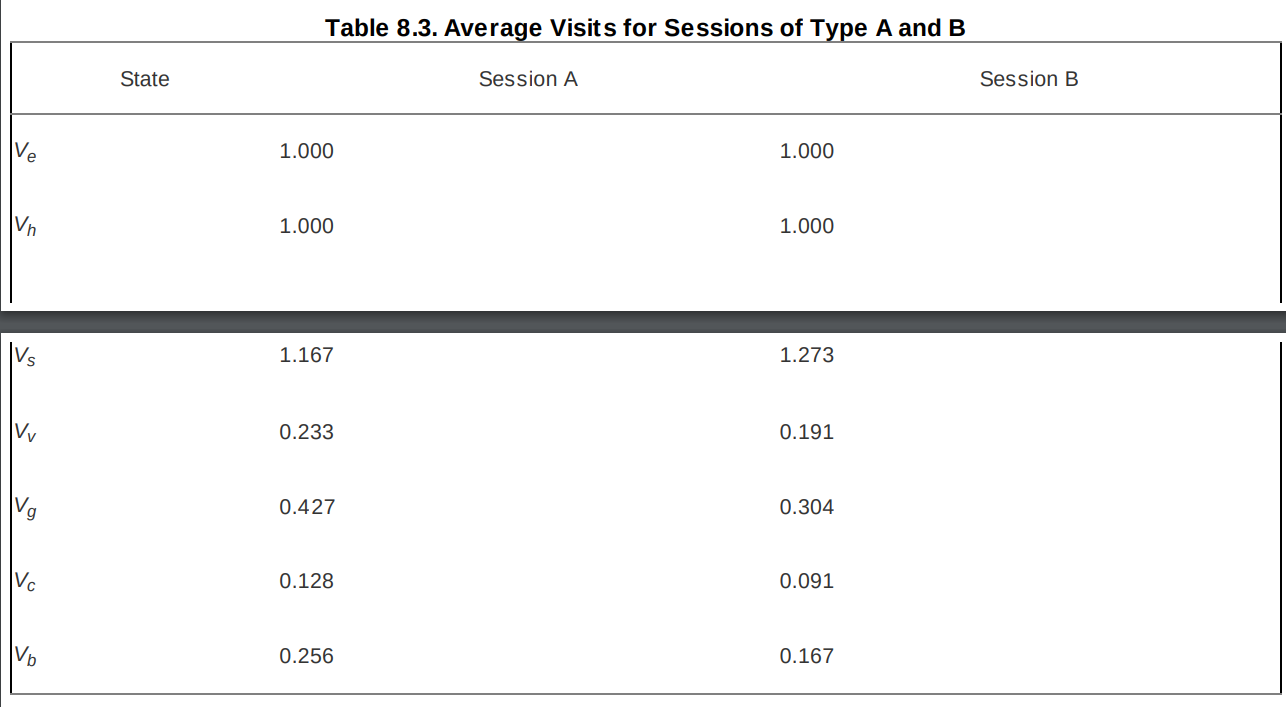

Como se puede ver a continuación, hemos creado una variable llamada `v_a`, la cual es un array que contiene el porcentaje de visitas que el usuario de tipo A realiza a cada estado y, también, hemos creado una variable llamada `v_b`, la cual es un array que contiene el porcentaje de visitas que el usuario de tipo B realiza a cada estado.

In [4]:
v_a = np.array(
    [
        1.0,
        1.167,
        0.233,
        0.427,
        0.128,
        0.256,
    ]
)


v_b = np.array(
    [
        1.0,
        1.273,
        0.191,
        0.304,
        0.091,
        0.167,
    ]
)

## Frecuencia de aparición de cada tipo de usuario

Como se puede observar a continuación, hemos creado una variable llamada `f_a` que cotienen la frecuencia de aparición del usuario de tipo A y, también, hemos creado otra variable llamada `f_b` que contiene la frecuencia de apareción del usuario de tipo B.

In [5]:
f_a = 0.25

f_b = 0.75

## Arquitectura del sistema

La arquitectura física donde se despliega el software del sistema de subastas web se compone de 3 servidores:
- Servidor web
- Sevidor de aplicaciones
- Servidor de base de datos
Además, cabe decir que cada servidor cuenta con CPU y DISCO y las diferentes operaciones demandan dichos recursos.


De esta forma, hemos creado una variable `K`, la cual es un array que contiene los recursos existentes en el sistema y, además, hemos creado una variable `R`, la cual contiene el conjunto de las distintas clases de operaciones que consumen recursos de computación.

In [6]:
K = ["WS_CPU", "WS_DISCO", "AS_CPU", "AS_DISCO", "DS_CPU", "DS_DISCO"]
R = ["h", "s", "g", "v", "c", "b"]

## Matriz de demandas

La matriz de demandas que contiene las demandas de cada recurso por cada clase de operación también ha sido extraída del libro de Menascé.

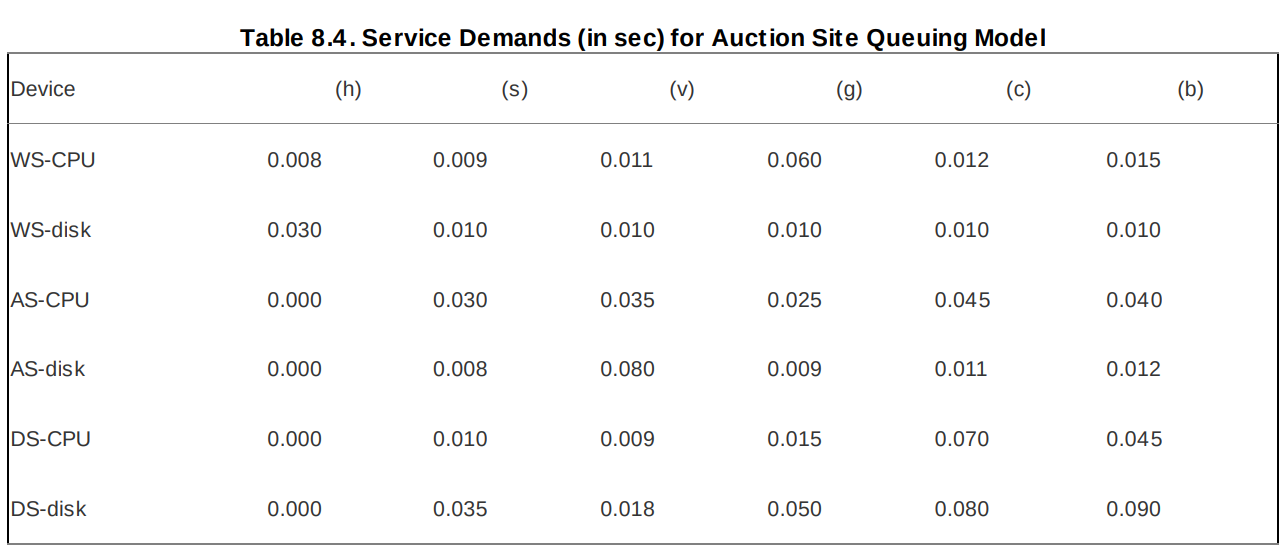

A continuación, se puede observar que hemos creado una matriz llamda `D`, la cual contiene la matriz de demandas mencionada.

In [7]:
D = np.array(
    [
        [0.008, 0.009, 0.011, 0.060, 0.012, 0.015],
        [0.030, 0.010, 0.010, 0.010, 0.010, 0.010],
        [0.000, 0.030, 0.035, 0.025, 0.045, 0.040],
        [0.000, 0.008, 0.080, 0.009, 0.011, 0.012],
        [0.000, 0.010, 0.009, 0.015, 0.070, 0.045],
        [0.000, 0.035, 0.018, 0.050, 0.080, 0.090],
    ]
)

## Configuración del servicio

Para llevar a cabo este trabajo se emplea la configuración básica. Dicha configuración consiste en tener una única instancia de cada servidor y se representa de la siguiente manera:
$$
<N_{WS}, N_{AS}, N_{DS}> = <1,1,1>
$$

Sin embargo, para que en este trabajo podamos emplear una notación más compacta emplenado el índice $i \in K$, lo que se hace es consisderar el siguiente vector de configuración $\vec{N} = <N_i>$ con $i \in K$. En nuestro trabajo, dicho vector será un vector de todo unos. 

A continuación, se puede ver que hemos creado una variable llamada `N`, la cual representa el vector de configuarción $\vec{N}$.

In [8]:
N = np.ones(len(K), dtype=int)

## Cuestiones

### 1. A partir de la configuración base, representar gráficamente $T_r(λ)$, para cada clase de operación r ∈ R, variando λ desde 5 op/sg a intervalos de 0,5 op/sg, hasta que algún recurso i ∈ K presente una utilización $U_i$≈0, 90.

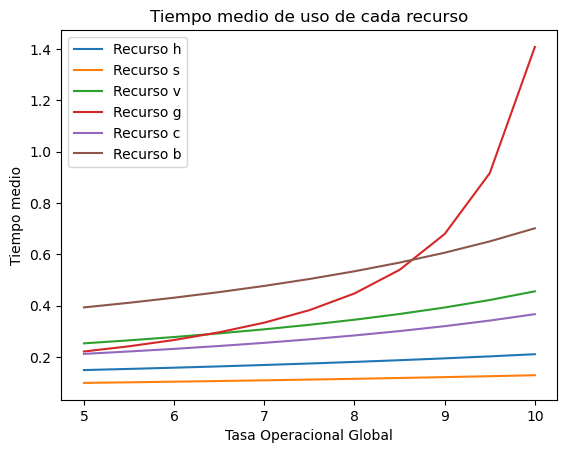

In [9]:
def calcular_tr_base_tasa_global(D, N, v_a, v_b, f_a, f_b):
    tasa_op_global = 4.5
    u_max = 0
    tasas_list = []
    T_r = []
    while u_max < 0.9:
        tasa_op_global += 0.5
        tasas = utils.calcular_tasa_operaciones_por_estado(
            tasa_op_global, v_a, v_b, f_a, f_b
        )
        u = [0] * len(tasas)  # utilizacion de cada recurso
        for i in range(len(N)):
            u[i] = utils.calcular_utilizacion_recurso(tasas, D[:, i], N[i])
        u_max = max(u)
        tasas_list.append(tasa_op_global)

        # Calcular tiempo de respuesta para cada operación
        t_r = utils.calcular_tiempo_respuesta_por_operacion(D, tasas, N)
        T_r.append(t_r)
    return tasas_list, T_r


tasas_list, T_r = calcular_tr_base_tasa_global(D, N, v_a, v_b, f_a, f_b)

# Tiempo de respuesta para cada operacion (Tr)
# Array con los nombres recursos: e, h, s, v, g, c, b, x (x es el estado de salida, e es el estado de entrada)
R = ["h", "s", "v", "g", "c", "b"]
for i in range(len(R)):
    plt.plot(tasas_list, [T_r[j][i] for j in range(len(T_r))], label=f"Recurso {R[i]}")

plt.title("Tiempo medio de uso de cada recurso")
plt.xlabel("Tasa Operacional Global")
plt.ylabel("Tiempo medio")
plt.legend()
plt.show()

### 2. Sobre la configuración base, represetar T(λ) siguiendo la experimentación anterior. Se establece en el SLA del servicio un tiempo $T_{SLA}$ de como mucho 4 sg. Indica si este valor es razonable.


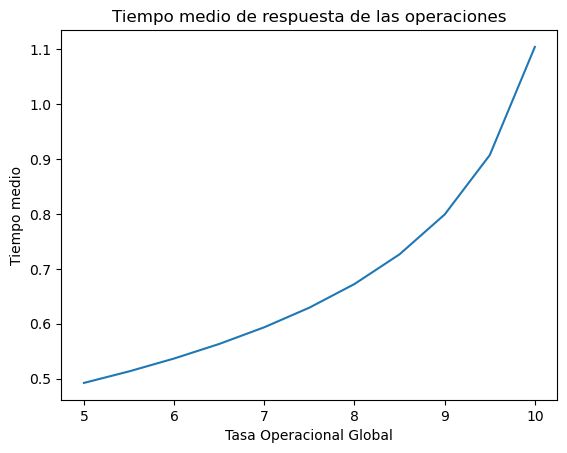

In [10]:
def calcular_t_base_tasa_global(D, N, v_a, v_b, f_a, f_b):
    tasa_op_global = 4.5
    u_max = 0
    tasas_list = []
    tiempo_medio_res = []
    while u_max < 0.9:
        tasa_op_global += 0.5
        tasas = utils.calcular_tasa_operaciones_por_estado(
            tasa_op_global, v_a, v_b, f_a, f_b
        )
        u = [0] * len(tasas)  # utilizacion de cada recurso
        for i in range(len(N)):
            u[i] = utils.calcular_utilizacion_recurso(tasas, D[:, i], N[i])
        u_max = max(u)
        tasas_list.append(tasa_op_global)

        # Calcular tiempo de residencia de cada estado
        t_r = utils.calcular_tiempo_respuesta_por_operacion(D, tasas, N)
        # Calcular tiempo medio de respuesta de las operaciones
        tiempo_medio_res.append(
            utils.calcular_tiempo_medio_respuesta_operaciones(
                tasas, tasa_op_global, t_r
            )
        )
    return tasas_list, tiempo_medio_res


tasas_list, tiempo_medio_res = calcular_t_base_tasa_global(D, N, v_a, v_b, f_a, f_b)

# T
plt.plot(tasas_list, tiempo_medio_res)
plt.title("Tiempo medio de respuesta de las operaciones")
plt.xlabel("Tasa Operacional Global")
plt.ylabel("Tiempo medio")
plt.show()

Como se puede observar en el gráfico anterior, el máximo tiempo de respuesta de las operaciones que hemos obtenido es 1,1sg, por lo que el valor máximo para T establecido en el SLA ($T_{SLA} = 4sg$) es bastante razonable.

### 3. Considera que la mezcla de tipos de usuario es fA = 0, 6 y fB = 0, 4. Realiza la misma experimentación anterior.


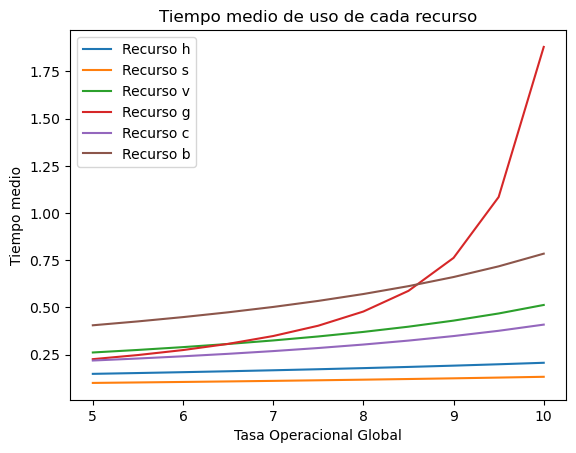

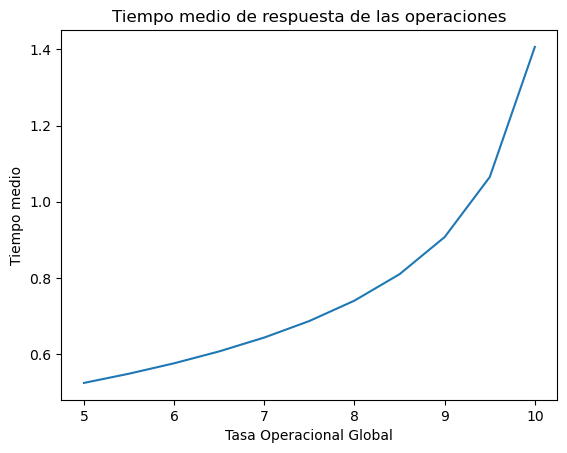

In [11]:
f_a = 0.6
f_b = 0.4


def calcular_tr_t_base_tasa_global(D, N, v_a, v_b, f_a, f_b):
    tasa_op_global = 4.5
    u_max = 0
    tasas_list = []
    u_list = []
    T_r = []
    tiempo_medio_res = []
    while u_max < 0.9:
        tasa_op_global += 0.5
        tasas = utils.calcular_tasa_operaciones_por_estado(
            tasa_op_global, v_a, v_b, f_a, f_b
        )
        u = [0] * len(tasas)  # utilizacion de cada recurso
        for i in range(len(N)):
            u[i] = utils.calcular_utilizacion_recurso(tasas, D[:, i], N[i])
        u_max = max(u)
        tasas_list.append(tasa_op_global)
        u_list.append(u)

        # Calcular tiempo de residencia de cada estado
        t_r = utils.calcular_tiempo_respuesta_por_operacion(D, tasas, N)
        T_r.append(t_r)
        # Calcular tiempo medio de respuesta de las operaciones
        tiempo_medio_res.append(
            utils.calcular_tiempo_medio_respuesta_operaciones(
                tasas, tasa_op_global, t_r
            )
        )
    return tasas_list, T_r, tiempo_medio_res


tasas_list, T_r, tiempo_medio_res = calcular_tr_t_base_tasa_global(
    D, N, v_a, v_b, f_a, f_b
)

# Tiempo de respuesta para cada operacion (Tr)
# Array con los nombres recursos: e, h, s, v, g, c, b, x (x es el estado de salida, e es el estado de entrada)
R = ["h", "s", "v", "g", "c", "b"]
for i in range(len(R)):
    plt.plot(tasas_list, [T_r[j][i] for j in range(len(T_r))], label=f"Recurso {R[i]}")


plt.title("Tiempo medio de uso de cada recurso")
plt.xlabel("Tasa Operacional Global")
plt.ylabel("Tiempo medio")
plt.legend()
plt.show()

# T
plt.plot(tasas_list, tiempo_medio_res)
plt.title("Tiempo medio de respuesta de las operaciones")
plt.xlabel("Tasa Operacional Global")
plt.ylabel("Tiempo medio")
plt.show()

### 4. Para la configuración base y los mismos tipos de usuario calcula de manera teórica la máxima carga soportable por el sistema $λ_{max}$ en función de la fracción de los distintos tipos de usuarios, de las demandas de los recursos, y de la fracción de visitas a cada estado del diagrama funcional.


Sabemos que la configuración base viene dada por el vector $\vec{N}$, el cual es, como hemos comentado previamente, un vector de todo unos. Los tipos de usuarios empleados son A y B, es decir, $\alpha \in {A, B}$. Además, cabe decir que, para esta explicación, emplearemos $i \in K$, donde K es el vector de recursos previamente visto, y también emplearemos $r \in R$, donde R es el vector de las diferentes clases de operaciones que consumen recursos de computación, como hemos visto previamente.

Se nos pide calcular $\lambda_{max}$ en función de la fracción de los distintos tipos de usuarios ($f_A$ y $f_B$), de las demandas de los recursos (D), y de la fracción de visitas a cada estado del diagrama funcional ($v^{\alpha}[r]$).

Sabemos que cuando la carga global del sistema es máxima, es decir, cuando se produce $\lambda_{max}$, entonces la utilización de cada uno de los recursos del sistema es la máxima, es decir, $U_i = 1$. 

Teniendo en cuenta todo lo anterior, partamos de la ecuación de utilización de un recurso para todas las clases de operaciones:
$$
U_i = \sum_{r \in R}\frac{\lambda_r}{N_i}*D_{i,r}
$$

Sustituyamos en la ecuación $U_i$ por 1 y $N_i$ por 1.

$$
1 = \sum_{r \in R}\lambda_r*D_{i,r}
$$

Además, sabemos que $\lambda_r$ se calcula, para nuestro caso que tenemos usuarios de tipo A y de tipo B, de la siguiente manera:

$$
\lambda_r = \lambda*(f_A*v^A[r] + f_B*v^B[r])
$$

En este caso, podemos sustuir $\lambda_r$ en la ecuación de $U_i$, pero teniendo en cuenta que en este caso $\lambda$ será máxima, es decir, será $\lambda_{max}$.

$$
1 = \sum_{r \in R}(\lambda_{max}*(f_A*v^A[r] + f_B*v^B[r]))*D_{i,r}
$$

Ahora, lo único que nos queda es despejar $\lambda_{max}$.

$$
\lambda_{max} = \frac{1}{\sum_{r \in R}(f_A*v^A[r] + f_B*v^B[r])*D_{i,r}}
$$

### 5. Representa la gráfica $\lambda_{max}(f_A)$ en función de la fracción $f_A$. Indica cuál es la mezcla $(f'_A, f'_B)$ de tipos de usuario más favorable desde el punto de vista de $\lambda_{max}$.


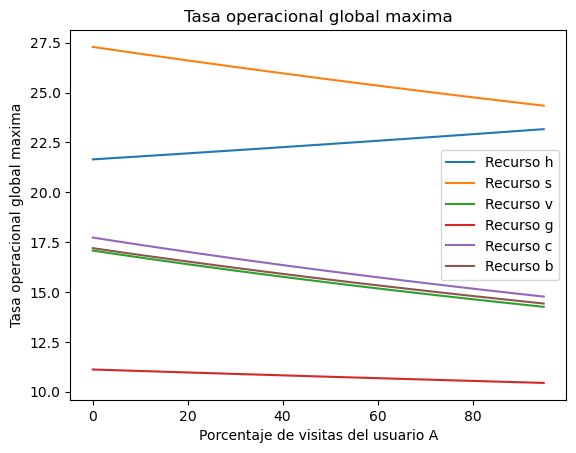

In [12]:
tasa_op_global_max = []
f_a = 0
f_b = 1 - f_a
while f_a <= 1:
    tasa_op_global_maximos = []
    for i in range(len(N)):
        tasa_op_global_maximos.append(1 / (np.sum((v_a * f_a + v_b * f_b) * D[:, i])))
    tasa_op_global_max.append(tasa_op_global_maximos)
    f_a += 0.05
    f_b = 1 - f_a

# Tiempo de respuesta para cada operacion (Tr)

# Array con los nombres recursos: e, h, s, v, g, c, b, x (x es el estado de salida, e es el estado de entrada)
R = ["h", "s", "v", "g", "c", "b"]
for i in range(len(R)):
    plt.plot(
        [i for i in range(0, 100, 5)],
        [tasa_op_global_max[j][i] for j in range(len(tasa_op_global_max))],
        label=f"Recurso {R[i]}",
    )

plt.title("Tasa operacional global maxima")
plt.xlabel("Porcentaje de visitas del usuario A")
plt.ylabel("Tasa operacional global maxima")
plt.legend()
plt.show()

# Cuestiones multiservidor

### Asumiendo la mezcla de usarios más favorable para el sistema, calcula el tiempo medio de respuesta $T(\vec{N},\lambda)$ para diferentes configuraciones y cargas globales de entrada. Considera que el número máximo de servidores en total no supera a 20 servidores, $\sum_{i\in K} N_i \leq 16$. Guarda los resultados discretos $T(\gamma) = T(\vec{N}(\gamma),\lambda(\gamma))$ para formar una base de datos de aprendizaje. $\gamma$ indica el número de experimento realizado. Muestra una tabla con la configuración, la carga máxima soportada hasta que algún recurso alcance una utilización $U_i = 0,9$ y el tiempo de respuesta de dicha carga. Compara los resultados con la configuración base y entre diferentes configuraciones.

Suponiendo que la mezcla de usuarios más favorable para el sistema es la que se puede ver en la gráfica anterior, es decir, $f_A = 0 y f_B = 1$, vamos a calcular el tiempo medio de respuesta $T(\vec{N},\lambda)$ para diferentes configuraciones y cargas globales de entrada. Para ello, vamos a emplear la siguiente ecuación:

$$
T_{i,r} = D_{i,r}*\frac{N_i-1}{N_i}+\frac{D_{i,r}}{1-\sum_{r \in R}\frac{\lambda_r}{N_i}*D_{i,r}}
$$

En ella se añade una penalización según el criterio de Seidmanns.

In [14]:
def calcular_t_base_tasa_global(D, N, v_a, v_b, f_a, f_b):
    tasa_op_global = 4.5
    u_max = 0
    tiempo_medio_res = np.inf
    while u_max < 0.9:
        tasa_op_global += 0.5
        tasas = utils.calcular_tasa_operaciones_por_estado(
            tasa_op_global, v_a, v_b, f_a, f_b
        )
        u = [0] * len(tasas)  # utilizacion de cada recurso
        for i in range(len(N)):
            u[i] = utils.calcular_utilizacion_recurso(tasas, D[:, i], N[i])
        u_max = max(u)
        # Calcular tiempo de residencia de cada estado
        t_r = utils.calcular_tiempo_respuesta_por_operacion(D, tasas, N)
        # Calcular tiempo medio de respuesta de las operaciones redondeado a 4 decimales
        tiempo_medio_res = utils.calcular_tiempo_medio_respuesta_operaciones(
            tasas, tasa_op_global, t_r
        ).round(4)
    return tasa_op_global, tiempo_medio_res


def generar_combinaciones_N():
    # Define the maximum value for each N_i and the maximum sum for N
    max_value = 16
    max_sum = 20
    # Generate all combinations of N
    return (
        (x, x, y, y, z, z)
        for x in range(1, max_value + 1)
        for y in range(1, max_value + 1)
        for z in range(1, max_value + 1)
        if x + y + z < max_sum
    )


base_datos_aprendizaje = []

combinaciones = generar_combinaciones_N()
try:
    # Es un bucle infinito, por que no hay una forma de saber cuando se acaban las combinaciones
    # hasta que se llega a la última y se lanza una excepción tipo StopIteration
    while True:
        N = next(combinaciones)
        f_a = 0
        f_b = 1 - f_a
        tasa_global, tiempo_medio_res = calcular_t_base_tasa_global(
            D, N, v_a, v_b, f_a, f_b
        )
        base_datos_aprendizaje.append((N, tasa_global, tiempo_medio_res))
except StopIteration:
    print("No hay más combinaciones posibles")

# Mostrar los resultados de la base de datos de aprendizaje de forma ordenada y bonita
print("|N|Tasa Global(op/s)|Tiempo medio de respuesta(s)|")
for i in range(len(base_datos_aprendizaje)):
    print(
        f"|{base_datos_aprendizaje[i][0]}|{base_datos_aprendizaje[i][1]}|{base_datos_aprendizaje[i][2]}|"
    )

# Guardar la base de datos de aprendizaje en un fichero
with open("base_datos_aprendizaje.txt", "w") as f:
    for i in range(len(base_datos_aprendizaje)):
        f.write(
            f"{base_datos_aprendizaje[i][0]} {base_datos_aprendizaje[i][1]} {base_datos_aprendizaje[i][2]}\n"
        )

No hay más combinaciones posibles
|N|Tasa Global(op/s)|Tiempo medio de respuesta(s)|
|(1, 1, 1, 1, 1, 1)|10.5|1.2837|
|(1, 1, 1, 1, 2, 2)|10.5|1.2183|
|(1, 1, 1, 1, 3, 3)|10.5|1.2075|
|(1, 1, 1, 1, 4, 4)|10.5|1.2031|
|(1, 1, 1, 1, 5, 5)|10.5|1.2007|
|(1, 1, 1, 1, 6, 6)|10.5|1.1992|
|(1, 1, 1, 1, 7, 7)|10.5|1.1981|
|(1, 1, 1, 1, 8, 8)|10.5|1.1974|
|(1, 1, 1, 1, 9, 9)|10.5|1.1968|
|(1, 1, 1, 1, 10, 10)|10.5|1.1963|
|(1, 1, 1, 1, 11, 11)|10.5|1.196|
|(1, 1, 1, 1, 12, 12)|10.5|1.1957|
|(1, 1, 1, 1, 13, 13)|10.5|1.1954|
|(1, 1, 1, 1, 14, 14)|10.5|1.1952|
|(1, 1, 1, 1, 15, 15)|10.5|1.195|
|(1, 1, 1, 1, 16, 16)|10.5|1.1949|
|(1, 1, 2, 2, 1, 1)|15.5|1.3916|
|(1, 1, 2, 2, 2, 2)|19.5|2.0251|
|(1, 1, 2, 2, 3, 3)|19.5|1.9844|
|(1, 1, 2, 2, 4, 4)|19.5|1.972|
|(1, 1, 2, 2, 5, 5)|19.5|1.966|
|(1, 1, 2, 2, 6, 6)|19.5|1.9625|
|(1, 1, 2, 2, 7, 7)|19.5|1.9602|
|(1, 1, 2, 2, 8, 8)|19.5|1.9585|
|(1, 1, 2, 2, 9, 9)|19.5|1.9573|
|(1, 1, 2, 2, 10, 10)|19.5|1.9563|
|(1, 1, 2, 2, 11, 11)|19.5|1.9556|
|(1, 1, 2,

### Cambios en los nº de servidores de web

[((1, 1, 1, 1, 1, 1), 10.5, 1.2837), ((2, 2, 1, 1, 1, 1), 10.5, 1.1728), ((3, 3, 1, 1, 1, 1), 10.5, 1.1488), ((4, 4, 1, 1, 1, 1), 10.5, 1.1384), ((5, 5, 1, 1, 1, 1), 10.5, 1.1325), ((6, 6, 1, 1, 1, 1), 10.5, 1.1288), ((7, 7, 1, 1, 1, 1), 10.5, 1.1262), ((8, 8, 1, 1, 1, 1), 10.5, 1.1242), ((9, 9, 1, 1, 1, 1), 10.5, 1.1228), ((10, 10, 1, 1, 1, 1), 10.5, 1.1216), ((11, 11, 1, 1, 1, 1), 10.5, 1.1207), ((12, 12, 1, 1, 1, 1), 10.5, 1.1199), ((13, 13, 1, 1, 1, 1), 10.5, 1.1192), ((14, 14, 1, 1, 1, 1), 10.5, 1.1187), ((15, 15, 1, 1, 1, 1), 10.5, 1.1182)]


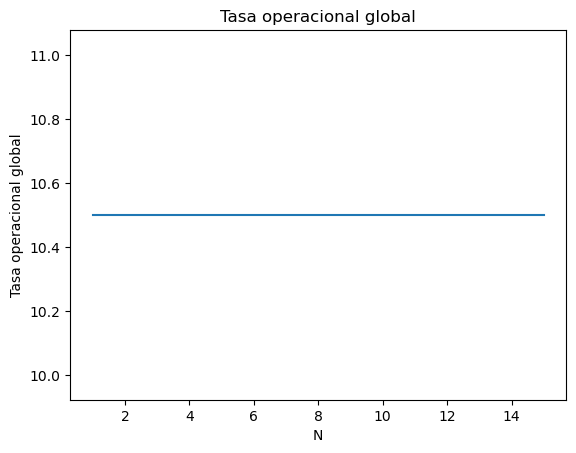

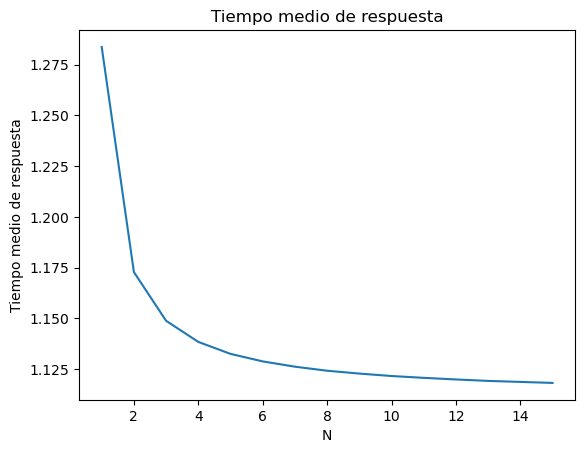

In [18]:
# Un grafico de tasa global y otro de tiempo medio de respuesta desde base de datos de aprendizaje
# Filtrar las combinaciones de N tal que N sea de la forma (x,x,1,1,1,1)
combinaciones = [
    x
    for x in base_datos_aprendizaje
    if x[0] in [(i, i, 1, 1, 1, 1) for i in range(1, 16)]
]

print(combinaciones)

# Grafico de tasa global
plt.plot([x[0][0] for x in combinaciones], [x[1] for x in combinaciones])
plt.title("Tasa operacional global")
plt.xlabel("N")
plt.ylabel("Tasa operacional global")
plt.show()

# Grafico de tiempo medio de respuesta
plt.plot([x[0][0] for x in combinaciones], [x[2] for x in combinaciones])
plt.title("Tiempo medio de respuesta")
plt.xlabel("N")
plt.ylabel("Tiempo medio de respuesta")
plt.show()

### Cambios en el nº de servidores de aplicación

[((1, 1, 1, 1, 1, 1), 10.5, 1.2837), ((1, 1, 2, 2, 1, 1), 15.5, 1.3916), ((1, 1, 3, 3, 1, 1), 15.5, 1.326), ((1, 1, 4, 4, 1, 1), 15.5, 1.3091), ((1, 1, 5, 5, 1, 1), 15.5, 1.3013), ((1, 1, 6, 6, 1, 1), 15.5, 1.2968), ((1, 1, 7, 7, 1, 1), 15.5, 1.2939), ((1, 1, 8, 8, 1, 1), 15.5, 1.2918), ((1, 1, 9, 9, 1, 1), 15.5, 1.2902), ((1, 1, 10, 10, 1, 1), 15.5, 1.2891), ((1, 1, 11, 11, 1, 1), 15.5, 1.2881), ((1, 1, 12, 12, 1, 1), 15.5, 1.2873), ((1, 1, 13, 13, 1, 1), 15.5, 1.2867), ((1, 1, 14, 14, 1, 1), 15.5, 1.2862), ((1, 1, 15, 15, 1, 1), 15.5, 1.2857)]


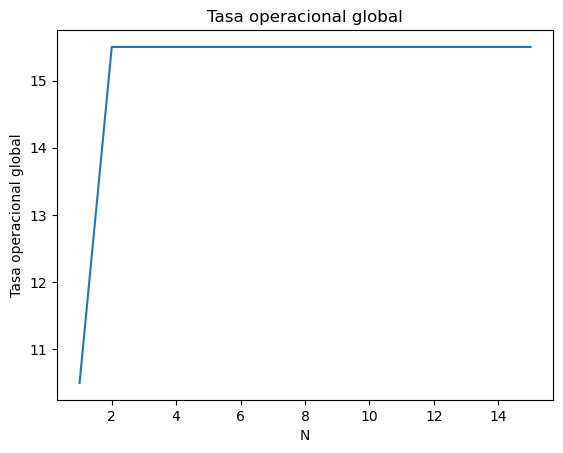

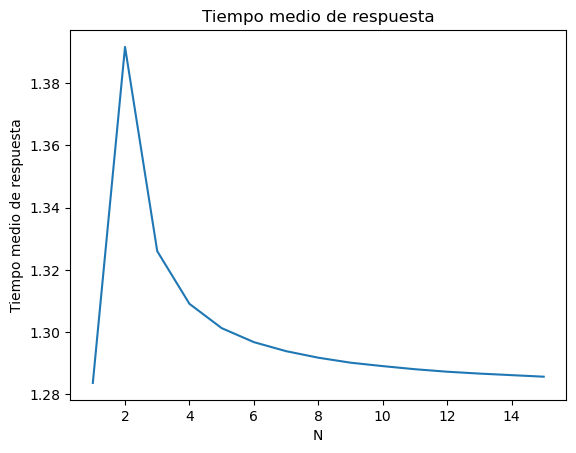

In [19]:
# Un grafico de tasa global y otro de tiempo medio de respuesta desde base de datos de aprendizaje
# Filtrar las combinaciones de N tal que N sea de la forma (1,1,x,x,1,1)
combinaciones = [
    x
    for x in base_datos_aprendizaje
    if x[0] in [(1, 1, i, i, 1, 1) for i in range(1, 16)]
]

print(combinaciones)

# Grafico de tasa global
plt.plot([x[0][2] for x in combinaciones], [x[1] for x in combinaciones])
plt.title("Tasa operacional global")
plt.xlabel("N")
plt.ylabel("Tasa operacional global")
plt.show()

# Grafico de tiempo medio de respuesta
plt.plot([x[0][2] for x in combinaciones], [x[2] for x in combinaciones])
plt.title("Tiempo medio de respuesta")
plt.xlabel("N")
plt.ylabel("Tiempo medio de respuesta")
plt.show()

### Cambios en el nº de servidores de base de datos

[((1, 1, 1, 1, 1, 1), 10.5, 1.2837), ((1, 1, 1, 1, 2, 2), 10.5, 1.2183), ((1, 1, 1, 1, 3, 3), 10.5, 1.2075), ((1, 1, 1, 1, 4, 4), 10.5, 1.2031), ((1, 1, 1, 1, 5, 5), 10.5, 1.2007), ((1, 1, 1, 1, 6, 6), 10.5, 1.1992), ((1, 1, 1, 1, 7, 7), 10.5, 1.1981), ((1, 1, 1, 1, 8, 8), 10.5, 1.1974), ((1, 1, 1, 1, 9, 9), 10.5, 1.1968), ((1, 1, 1, 1, 10, 10), 10.5, 1.1963), ((1, 1, 1, 1, 11, 11), 10.5, 1.196), ((1, 1, 1, 1, 12, 12), 10.5, 1.1957), ((1, 1, 1, 1, 13, 13), 10.5, 1.1954), ((1, 1, 1, 1, 14, 14), 10.5, 1.1952), ((1, 1, 1, 1, 15, 15), 10.5, 1.195)]


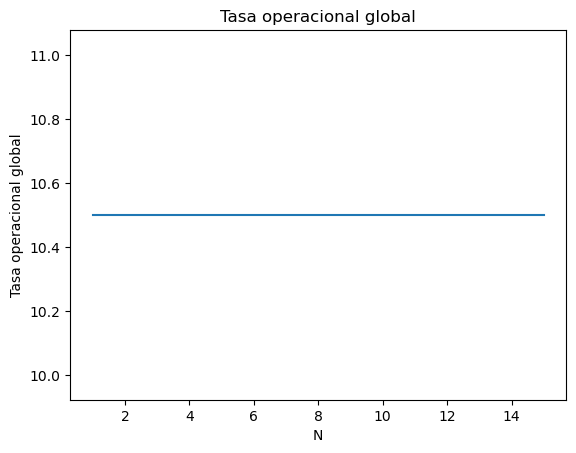

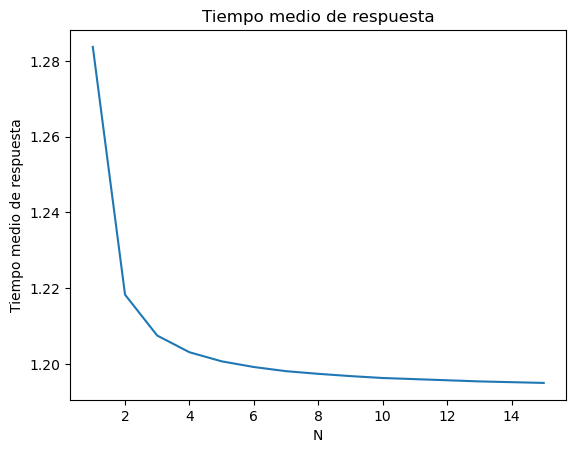

In [28]:
# Un grafico de tasa global y otro de tiempo medio de respuesta desde base de datos de aprendizaje
# Filtrar las combinaciones de N tal que N sea de la forma (1,1,1,1,x,x)
combinaciones = [
    x
    for x in base_datos_aprendizaje
    if x[0] in [(1, 1, 1, 1, i, i) for i in range(1, 16)]
]

print(combinaciones)

# Grafico de tasa global
plt.plot([x[0][4] for x in combinaciones], [x[1] for x in combinaciones])
plt.title("Tasa operacional global")
plt.xlabel("N")
plt.ylabel("Tasa operacional global")
plt.show()

# Grafico de tiempo medio de respuesta
plt.plot([x[0][4] for x in combinaciones], [x[2] for x in combinaciones])
plt.title("Tiempo medio de respuesta")
plt.xlabel("N")
plt.ylabel("Tiempo medio de respuesta")
plt.show()